# Single cell start guide to polly python.
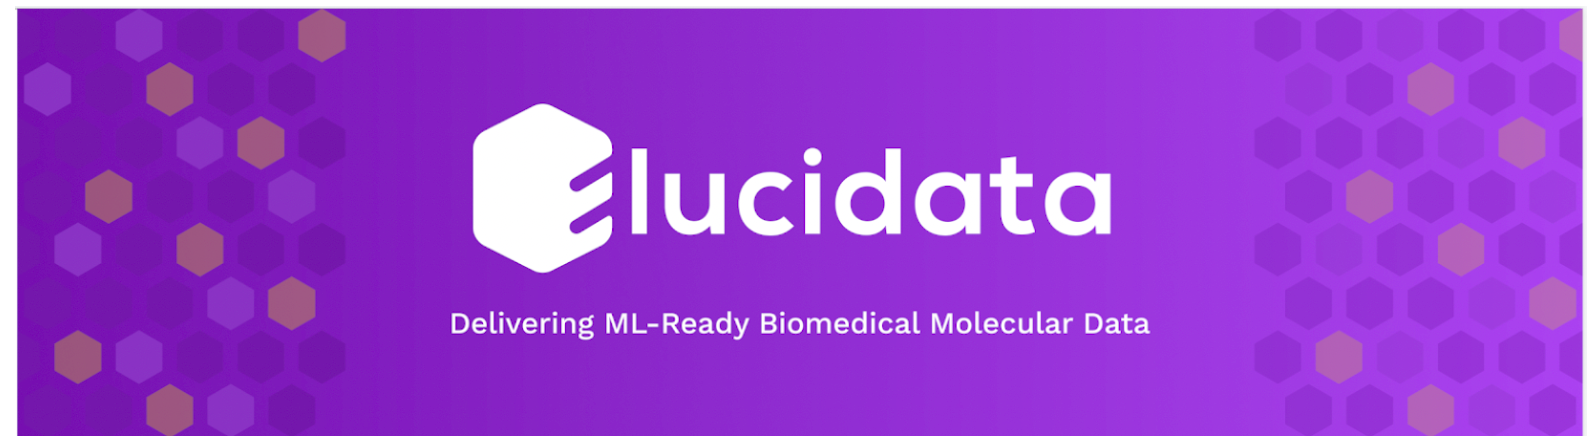

# Polly Python Demo

This notebook would help you in starting your journey with Polly Python in your research roadways. This quickstart guide consists of :
- Data schema on Polly
- Browse Single cell data to query at dataset and matrix
- Loking at gene levels across various datasets
- Downloading the dataset
 


# Set up
Polly Python library provides convenient access to data in OmixAtlas through functions in Python language. <br> Polly Python can be installed via `pip3 install polly-python` <br> In any computational platform (like DataBricks, SageMaker, Polly) or your local environment.

https://docs.elucidata.io/OmixAtlas/Polly%20Python.html

### Installing packages and Importing libraries

In [23]:
!sudo pip3 install polly-python
!sudo pip3 install scanpy
!sudo pip3 install plotly

     |████████████████████████████████| 82 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 12.0 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 125.6 MB/s eta 0:00:01
     |████████████████████████████████| 316 kB 141.9 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 18.6 MB/s  eta 0:00:01
     |████████████████████████████████| 510 kB 135.9 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 3.3 MB/s s eta 0:00:01
     |████████████████████████████████| 134 kB 136.4 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 20.6 MB/s  eta 0:00:01
     |████████████████████████████████| 7.4 MB 113.9 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 149 kB 137.5 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 20.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 138.4 MB/s eta 0:00:01
     |██████████████████████

In [24]:
# Import required libraries
from polly.omixatlas import OmixAtlas
from polly.cohort import Cohort
from polly.auth import Polly

# For data wrangling and display
import pandas as pd
from json import dumps
import os
import re
from IPython.display import HTML

# To parse h5ad file
import scanpy as sc

#To parse gct file
from cmapPy.pandasGEXpress.parse import parse
from cmapPy.pandasGEXpress import GCToo
from IPython.utils import io
import warnings

### Authentication

In [25]:
Polly.auth(os.environ['POLLY_REFRESH_TOKEN'])

In [26]:
omixatlas = OmixAtlas()

### Let us look at the summary and schema of our omixatlas

In [27]:
omixatlas.omixatlas_summary("sc_data_lake")

{'data': {'repo_name': 'sc_data_lake',
  'repo_id': '17',
  'indexes': {'files': 'sc_data_lake_files',
   'gct_col_metadata': 'sc_data_lake_gct_col_metadata',
   'h5ad_col_metadata': 'sc_data_lake_h5ad_col_metadata',
   'h5ad_row_metadata': 'sc_data_lake_h5ad_row_metadata'},
  'v2_indexes': {'files': 'sc_data_lake_files',
   'gct_col_metadata': 'sc_data_lake_gct_col_metadata',
   'h5ad_col_metadata': 'sc_data_lake_h5ad_col_metadata',
   'h5ad_row_metadata': 'sc_data_lake_h5ad_row_metadata'},
  'linked_workspace_id': None,
  'sources': [{'geo': 3420},
   {'scp': 264},
   {'expression atlas': 199},
   {'tabula sapiens': 24},
   {'htan': 22},
   {'humancellatlas': 7},
   {'publication': 3},
   {'zenodo': 1}],
  'datatypes': [{'single cell': 3943}],
  'dataset_count': 3943,
  'disease_count': 900,
  'tissue_count': 556,
  'organism_count': 11,
  'cell_line_count': 163,
  'cell_type_count': 811,
  'drug_count': 229,
  'data_type_count': 1,
  'data_source_count': 8,
  'sample_count': 5161187

### Checking schema of each table in the Atlas

In [28]:
schema = omixatlas.get_schema("17", schema_level = ["datasets", "samples_singlecell","features_singlecell"], return_type = 'dataframe')

In [29]:
schema.datasets

,Source,Datatype,Field Name,Field Description,Field Type,Is Curated,Is Array
0,all,all,abstract,Abstract of the publication assocaited with th...,text,False,False
1,all,all,author,Name of the author who published the dataset,text,False,False
2,all,all,bucket,S3 bucket in which the data file resides,text,False,False
3,all,all,celltype_annotation_available,Availability of cell type annotation,text,False,False
4,all,all,curated_cell_line,Cell lines from which the samples were derived...,text,False,True
5,all,all,curated_cell_type,Types of cell present in the dataset,text,False,True
6,all,all,curated_disease,Disease associated with the dataset,text,False,True
7,all,all,curated_drug,Drugs administered in the samples belonging to...,text,False,True
8,all,all,curated_gene,Gene studied in the dataset,text,False,True
9,all,all,curated_organism,Orgnism from which the samples were derived,text,False,True


In [30]:
schema.samples_singlecell

,Source,Datatype,Field Name,Field Description,Field Type,Is Curated,Is Array
0,all,all,age,Age of the organism from whom the sample was t...,text,False,False
1,all,all,characteristics_ch1,characteristics_ch1,text,False,False
2,all,all,clusters,Cell Type Cluster,text,False,False
3,all,all,curated_cell_line,Cell line from which the sample was derived,text,False,True
4,all,all,curated_cell_ontology_id,Curated Cell Ontology ID,text,False,False
5,all,all,curated_cell_type,Curated cell type,text,False,True
6,all,all,curated_cell_type_singler,kw_cell_type_singler,text,False,False
7,all,all,curated_disease,Disease associated with the sample,text,False,True
8,all,all,curated_drug,Drug admistered in the sample,text,False,True
9,all,all,curated_gene,Gene of interest in the sample,text,False,True


In [31]:
schema.features_singlecell

,Source,Datatype,Field Name,Field Description,Field Type,Is Curated,Is Array
0,all,all,data_id,Unique ID for this data entity on Polly,text,False,False
1,all,all,dataset_id,ID of the dataset in which the feature has bee...,text,False,False
2,all,all,feature_id,"ID of the feature (gene, protein, metabolite e...",text,False,False
3,all,all,highly_variable,Whether gene is highly variable,text,False,False
4,all,all,id_key,Name of the key that was used for creation of ...,text,False,False
5,all,all,is_current,Whether this is the current version of the dat...,text,False,False
6,all,all,n_cells,Number of cells containing the gene,text,False,False
7,all,all,name,Name of the data entity (local to its source f...,text,False,False
8,all,all,src_dataset_id,Dataset ID of the file this data entity origin...,text,False,False
9,all,all,src_repo,Name of the repository this data entity origin...,text,False,False


### Querying data using the recommend function
Ontology recommendation functionality for disease, tissue are added in Polly-Python. In the existing SQL query itslef, the users would now be able to call a function - 'recommend' on disease and tissue column of metadata to get recommendations.
To look at more such functions - https://github.com/ElucidataInc/polly-python/blob/main/Discover/ontology_recommendations_disease_tissue.ipynb

In [32]:
query = """SELECT * FROM sc_data_lake.datasets 
            WHERE (CONTAINS(curated_disease, recommend('curated_disease', 'Autoimmune', 'related'))
            OR CONTAINS(curated_tissue, recommend('curated_tissue', 'blood', 'related')))"""
results=omixatlas.query_metadata(query, query_api_version="v2")
results

Query execution succeeded (time taken: 2.15 seconds, data scanned: 1.489 MB)
Fetched 364 rows


,dataset_id,abstract,author,bucket,celltype_annotation_available,curated_cell_line,curated_cell_type,curated_disease,curated_drug,curated_gene,curated_organism,curated_strain,curated_tissue,data_table_name,data_table_version,data_type,dataset_source,description,drug_smiles,file_location,file_type,is_current,key,manually_curated_fields,overall_design,package,platform,publication,region,src_repo,src_uri,summary,timestamp_,total_num_cells,total_num_samples,version,year
0,GSE136731_GPL20301,,,discover-prod-datalake-v1,False,[None],[dendritic cell],"[Scleroderma, Systemic, Lupus Erythematosus, S...",[None],"[CD163, CD81, HLA-DQA1, CD5, FCGR1A, CD14]",[Homo sapiens],[None],[blood],,NaN,Single cell,GEO,RNA-seq of circulating inflammatory human cDC2...,[],https://discover-prod-datalake-v1.s3-us-west-2...,h5ad,true,sc_data_lake/data/GSE136731_GPL20301/GSE136731...,"{'dataset_level': ['disease', 'kw_drug', 'tiss...",Four distinct subsets of circulating human cDC...,sc_data_lake/data,sc-RNASeq,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,us-west-2,sc_data_lake,polly:data://sc_data_lake/data/GSE136731_GPL20...,Distinct subsets of circulating human cDC2 den...,1668242852329,47.0,47.0,0,
1,GSE137539_GPL24247,,,discover-prod-datalake-v1,True,[None],"[dendritic cell, human, T cell, CD14-positive ...","[Coloboma, Bacterial Infections, Escherichia c...",[None],"[KIT, CD33]",[Mus musculus],[],"[peripheral blood, spleen, peritoneal cavity, ...",,NaN,Single cell,GEO,Single-cell transcriptome profiling reveals ne...,[],https://discover-prod-datalake-v1.s3-us-west-2...,h5ad,true,sc_data_lake/data/GSE137539_GPL24247/GSE137539...,"{'dataset_level': [], 'sample_level': ['kw_cur...",There are 10 mouse samples and 1 human sample....,sc_data_lake/data,sc-RNASeq,https://pubmed.ncbi.nlm.nih.gov/32719519/,us-west-2,sc_data_lake,polly:data://sc_data_lake/data/GSE137539_GPL24...,The full neutrophil heterogeneity and differen...,1668609139066,19292.0,4.0,0,2020
2,GSE137539_GPL24676,,,discover-prod-datalake-v1,Not Curatable,[None],"[granulocyte monocyte progenitor cell, mature ...","[Bacterial Infections, Coloboma, Normal]",[None],"[KIT, CD33]",[Homo sapiens],[],"[peripheral blood, liver, peritoneal cavity, s...",sc_data_lake__gse137539_gpl24676,0.0,Single cell,GEO,Single-cell transcriptome profiling reveals ne...,[],https://discover-prod-datalake-v1.s3-us-west-2...,h5ad,true,sc_data_lake/data/GSE137539_GPL24676/GSE137539...,"{'dataset_level': [], 'sample_level': ['kw_cur...",There are 10 mouse samples and 1 human sample....,sc_data_lake/data,sc-RNASeq,https://pubmed.ncbi.nlm.nih.gov/32719519/,us-west-2,sc_data_lake,polly:data://sc_data_lake/data/GSE137539_GPL24...,The full neutrophil heterogeneity and differen...,1668243357159,29622.0,3.0,0,2020
3,GSE137545_GPL9052,,,discover-prod-datalake-v1,False,[None],[],"[Multiple Myeloma, Plasmacytoma anaplastic, My...",[None],"[CXCR4, CXCL12]",[Homo sapiens],[None],"[peripheral blood, bone marrow]",,NaN,Single cell,GEO,Single cell RNA sequencing revealed a chemokin...,[],https://discover-prod-datalake-v1.s3-us-west-2...,h5ad,true,sc_data_lake/data/GSE137545_GPL9052/GSE137545_...,,We perform single cell RNA-seq using Smart-Seq...,sc_data_lake/data,sc-RNASeq,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,us-west-2,sc_data_lake,polly:data://sc_data_lake/data/GSE137545_GPL90...,To determine the mechanisms of the initial ext...,1668243381402,30.0,30.0,0,
4,GSE137710_GPL24247,,,discover-prod-datalake-v1,True,[None],"[dendritic cell, human, monoblast]","[Melanoma, Normal, Autoimmune Diseases]",[None],"[CD8A, PTPRC, CD4, TRIM27, CDK1, TBX21]",[Mus musculus],[],[spleen],,NaN,Single cell,GEO,Transcriptional basis of mouse and human dendr...,[],https://discover-prod-datalake-v1.s3-us-west-2...,h5ad,true,sc_data_lake/data/GSE137710_GPL24247/GSE137710...,"{'dataset_level': [], 'sample_level': ['kw_cur...",Single-cell RNA sequencing was performed on mo...,sc_data_lake/data,sc-RNASeq,https://pubmed.ncbi.nlm.nih.gov/31668803/,us

In [68]:
results.data_table_name.unique()

array(['', 'sc_data_lake__gse137539_gpl24676',
       'sc_data_lake__gse137710_gpl24676_melanoma',
       'sc_data_lake__gse137710_gpl24676_spleen',
       'sc_data_lake__gse141238_gpl20795',
       'sc_data_lake__gse141922_gpl19057',
       'sc_data_lake__gse142016_gpl21290',
       'sc_data_lake__gse142637_gpl21290',
       'sc_data_lake__gse144038_gpl19057',
       'sc_data_lake__gse144317_gpl19057',
       'sc_data_lake__gse144430_gpl18573',
       'sc_data_lake__gse144568_gpl24676',
       'sc_data_lake__gse145095_gpl20301',
       'sc_data_lake__gse145095_gpl21103',
       'sc_data_lake__gse145121_gpl19057',
       'sc_data_lake__gse145281_gpl20301',
       'sc_data_lake__gse145306_gpl16791',
       'sc_data_lake__gse145531_gpl20301',
       'sc_data_lake__gse145562_gpl24247',
       'sc_data_lake__gse145668_gpl20301',
       'sc_data_lake__gse145922_gpl19057',
       'sc_data_lake__gse146165_gpl20301',
       'sc_data_lake__gse146763_gpl20301',
       'sc_data_lake__gse147104_gp

### Let us look at the cells in the dataset GSE137539_GPL24676 using the sample level data

In [74]:
cells = omixatlas.query_metadata(
    f"""
    SELECT *
    FROM sc_data_lake.samples_singlecell
    WHERE src_dataset_id = 'GSE142637_GPL21290'
    """
)

Query execution succeeded (time taken: 7.05 seconds, data scanned: 256.784 MB)
Fetched 19952 rows


In [75]:
cells.head()

,dataset_id,src_dataset_id,age,characteristics_ch1,clusters,curated_cell_line,curated_cell_ontology_id,curated_cell_type,curated_cell_type_singler,curated_disease,curated_drug,curated_gene,curated_gene_modified,curated_genetic_modification_type,curated_marker_absent,curated_marker_present,curated_raw_cell_type,curated_tissue,data_id,developmental_stage,donor,gender,gene_counts,id_key,is_current,location,name,organ,organism_part,percent_mito,sample,sample_id,src_repo,src_uri,strain,timestamp_,title,umi_counts,version
0,[],GSE142637_GPL21290,,diagnosis: Healthy|||tissue: Peripheral Blood|...,18,[none],CL:0000775,[neutrophil],,[Normal],[none],[],[],[],[none],[neutrophil-FCGR3B|S100A4],neutrophil,[peripheral blood],gsm4233280_attctacagatgggct,,,,2050,kw_column,true,,GSM4233280:ATTCTACAGATGGGCT,,,0.06809041649103165,GSM4233280,GSM4233280:ATTCTACAGATGGGCT,sc_data_lake,polly:data://sc_data_lake/data/GSE142637_GPL21...,,1668609119257,scRNA Human Blood Untreated,7211.0,0
1,[],GSE142637_GPL21290,,diagnosis: Healthy|||tissue: Peripheral Blood|...,0,[none],CL:0000775,[neutrophil],,[Normal],[none],[],[],[],[none],[neutrophil-FCGR3B|S100A4],neutrophil,[peripheral blood],gsm4233280_attctacagatgttag,,,,1185,kw_column,true,,GSM4233280:ATTCTACAGATGTTAG,,,0.06533749401569366,GSM4233280,GSM4233280:ATTCTACAGATGTTAG,sc_data_lake,polly:data://sc_data_lake/data/GSE142637_GPL21...,,1668609119257,scRNA Human Blood Untreated,4163.0,0
2,[],GSE142637_GPL21290,,diagnosis: Healthy|||tissue: Peripheral Blood|...,1,[none],CL:0000775,[neutrophil],,[Normal],[none],[],[],[],[none],[neutrophil-FCGR3B|S100A4],neutrophil,[peripheral blood],gsm4233280_attctacaggacgcta,,,,1754,kw_column,true,,GSM4233280:ATTCTACAGGACGCTA,,,0.06627537310123444,GSM4233280,GSM4233280:ATTCTACAGGACGCTA,sc_data_lake,polly:data://sc_data_lake/data/GSE142637_GPL21...,,1668609119257,scRNA Human Blood Untreated,4089.0,0
3,[],GSE142637_GPL21290,,diagnosis: Healthy|||tissue: Peripheral Blood|...,12,[none],CL:0000623,[natural killer cell],,[Normal],[none],[],[],[],[none],[natural killer cell-NKG7|GNLY],natural killer cell,[peripheral blood],gsm4233280_attctacagtcgaaat,,,,1667,kw_column,true,,GSM4233280:ATTCTACAGTCGAAAT,,,0.07385264337062836,GSM4233280,GSM4233280:ATTCTACAGTCGAAAT,sc_data_lake,polly:data://sc_data_lake/data/GSE142637_GPL21...,,1668609119258,scRNA Human Blood Untreated,5687.0,0
4,[],GSE142637_GPL21290,,diagnosis: Healthy|||tissue: Peripheral Blood|...,0,[none],CL:0000775,[neutrophil],,[Normal],[none],[],[],[],[none],[neutrophil-FCGR3B|S100A4],neutrophil,[peripheral blood],gsm4233280_attctacagttgcatc,,,,2354,kw_column,true,,GSM4233280:ATTCTACAGTTGCATC,,,0.07734942436218262,GSM4233280,GSM4233280:ATTCTACAGTTGCATC,sc_data_lake,polly:data://sc_data_lake/data/GSE142637_GPL21...,,1668609119258,scRNA Human Blood Untreated,8119.0,0


In [82]:
cells = cells.explode('curated_cell_type')

#### Looking at the value counts

In [83]:
cells['title'].value_counts()


scRNA Human Blood IFN lambda    6985
scRNA Human Blood Untreated     6904
scRNA Human Blood IFN alpha     6063
Name: title, dtype: int64

#### Looking at the value counts for cell types

In [84]:
cells['curated_cell_type'].value_counts()

neutrophil                                    8750
CD4-positive helper T cell                    6741
CD14-positive monocyte                        1230
natural killer cell                           1167
B cell                                        1026
CD8-positive, alpha-beta regulatory T cell     658
eosinophil                                     380
Name: curated_cell_type, dtype: int64

In [85]:
import pandas as pd
pd.crosstab(cells['curated_cell_type'],cells['title'])

title,scRNA Human Blood IFN alpha,scRNA Human Blood IFN lambda,scRNA Human Blood Untreated
curated_cell_type,,,
B cell,343,328,355
CD14-positive monocyte,339,416,475
CD4-positive helper T cell,2136,2290,2315
"CD8-positive, alpha-beta regulatory T cell",1,339,318
eosinophil,102,155,123
natural killer cell,601,278,288
neutrophil,2541,3179,3030


### Looking at the gene level data through the matrix

In [45]:
data_table_name

''

In [88]:
#Querying the entire data matrix for this dataset ID
df = omixatlas.query_metadata(
    "SELECT * FROM sc_data_lake.datasets WHERE dataset_id = 'GSE142637_GPL21290'"
)
data_table_name = df['data_table_name'][0]

matrix_df = omixatlas.query_metadata(
    f"""
    SELECT *
        FROM data_matrices.{data_table_name}
    """
)
matrix_df.head()

Query execution succeeded (time taken: 1.86 seconds, data scanned: 0.360 MB)
Fetched 1 rows
Query execution succeeded (time taken: 11.55 seconds, data scanned: 9.054 MB)
Fetched 19952 rows


aagab  aatk  abat  abca1  abca13  abca5  abca7  abcc1  abcc3  abcc5  abcd1  \
0    0.0   0.0   0.0   13.0     0.0    2.0    0.0    1.0    0.0    0.0    0.0   
1    0.0   0.0   0.0    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0   0.0   0.0    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0   0.0   0.0    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0   0.0   0.0    0.0     0.0    1.0    1.0    0.0    0.0    0.0    0.0   

   abcg1  abhd1  abhd13  abhd16a  abhd17c  abhd18  abhd2  abhd3  abhd4  abhd5  \
0    0.0    0.0     0.0      0.0      0.0     0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0     0.0      0.0      0.0     0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0     0.0      0.0      0.0     1.0    0.0    0.0    0.0    0.0   
3    0.0    0.0     0.0      0.0      0.0     0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0     0.0      0.0      0.0     0.0    0.0    0.0    0.0    0.0   

   abhd8  abi1  abl2  ablim3  abr  abtb1  abtb2  ac002091_1  ac002091_2  \
0    0.0   3.0   2.0     0.0  2.0    0.0    0.0         0.0         0.0   
1    0.0   1.0   0.0     0.0  0.0    0.0    0.0         0.0         0.0   
2    0.0   0.0   0.0     0.0  0.0    0.0    0.0         0.0         0.0   
3    0.0   0.0   0.0     0.0  0.0    0.0    0.0         0.0         0.0   
4    0.0   0.0   0.0     0.0  0.0    0.0    0.0         0.0         0.0   

   ac002467_1  ac002511_2  ac003681_1  ac004223_2  ac004241_1  ac004846_2  \
0         0.0         0.0         2.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   ac004951_1  ac005070_3  ac005224_3  ac005280_2  ac005363_2  ac005899_5  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         1.0         0.0         0.0         0.0         0.0   

   ac005899_6  ac006449_2  ac006449_6  ac006480_2  ac006942_1  ac007032_1  \
0         0.0         0.0         0.0         1.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   ac007262_2  ac007298_2  ac007336_1  ac007342_4  ac007342_5  ac007384_1  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   ac007613_1  ac007620_2  ac007686_3  ac007728_2  ac007878_1  ac007950_2  \
0         0.0         1.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   ac008040_5  ac008440_2  ac008467_1  ac008676_1  ac008735_2  ac008763_2  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0       

### Intergrating the cell and gene data

In [91]:
df = omixatlas.query_metadata(
    "SELECT * FROM sc_data_lake.datasets WHERE dataset_id = 'GSE142637_GPL21290'"
)
data_table_name = df['data_table_name'][0]

matrix_df = omixatlas.query_metadata(
    f"""
    SELECT *
    FROM (
        SELECT *
        FROM sc_data_lake.samples_singlecell
        WHERE src_dataset_id = 'GSE142637_GPL21290'
    ) AS obs
    INNER JOIN (
        SELECT *
        FROM data_matrices.{data_table_name}
    ) AS matrix
    ON obs.name = matrix.obs_name
    """
)
matrix_df.head()

Query execution succeeded (time taken: 1.83 seconds, data scanned: 0.360 MB)
Fetched 1 rows
Query execution succeeded (time taken: 17.10 seconds, data scanned: 265.838 MB)
Fetched 19952 rows


dataset_id      src_dataset_id  aagab  aatk  abat  abca1  abca13  abca5  \
0         []  GSE142637_GPL21290    0.0   0.0   0.0    0.0     0.0    0.0   
1         []  GSE142637_GPL21290    0.0   0.0   0.0    0.0     0.0    0.0   
2         []  GSE142637_GPL21290    0.0   0.0   0.0    0.0     0.0    0.0   
3         []  GSE142637_GPL21290    0.0   0.0   0.0    0.0     0.0    0.0   
4         []  GSE142637_GPL21290    0.0   0.0   0.0    1.0     0.0    0.0   

   abca7  abcc1  abcc3  abcc5  abcd1  abcg1  abhd1  abhd13  abhd16a  abhd17c  \
0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0      0.0      0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0     2.0      0.0      0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0      0.0      0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0     1.0      0.0      0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0      0.0      0.0   

   abhd18  abhd2  abhd3  abhd4  abhd5  abhd8  abi1  abl2  ablim3  abr  abtb1  \
0     0.0    0.0    0.0    0.0    0.0    0.0   0.0   0.0     0.0  0.0    1.0   
1     0.0    0.0    0.0    1.0    0.0    0.0   0.0   0.0     0.0  1.0    0.0   
2     0.0    0.0    1.0    0.0    1.0    0.0   0.0   0.0     0.0  1.0    1.0   
3     0.0    3.0    0.0    0.0    0.0    0.0   1.0   0.0     0.0  0.0    1.0   
4     0.0    0.0    0.0    0.0    0.0    0.0   0.0   0.0     0.0  0.0    0.0   

   abtb2  ac002091_1  ac002091_2  ac002467_1  ac002511_2  ac003681_1  \
0    0.0         0.0         0.0         0.0         0.0         0.0   
1    0.0         0.0         0.0         0.0         0.0         0.0   
2    0.0         0.0         0.0         1.0         0.0         0.0   
3    0.0         0.0         0.0         0.0         0.0         0.0   
4    0.0         0.0         0.0         0.0         0.0         0.0   

   ac004223_2  ac004241_1  ac004846_2  ac004951_1  ac005070_3  ac005224_3  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   ac005280_2  ac005363_2  ac005899_5  ac005899_6  ac006449_2  ac006449_6  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         1.0         0.0         0.0         0.0         0.0   
2         1.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   ac006480_2  ac006942_1  ac007032_1  ac007262_2  ac007298_2  ac007336_1  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   ac007342_4  ac007342_5  ac007384_1  ac007613_1  ac007620_2  ac007686_3  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   ac007728_2  ac007878_1  ac007950_2  ac008040_5  ac008440_2  ac008467_1  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0

### Queries to understand the gene expression levels

In [143]:
# Looking at CCL2 expression 
df3 = omixatlas.query_metadata(
    f"""
    SELECT obs_name, ccl2 , cells.curated_cell_type,cells.title
    FROM data_matrices.{data_table_name} as matrix
    JOIN (SELECT * FROM sc_data_lake.samples_singlecell
    WHERE src_dataset_id = 'GSE142637_GPL21290') as cells 
    ON cells.sample_id = matrix.obs_name
    AND matrix.ccl2 > 0""")
df3

Query execution succeeded (time taken: 4.13 seconds, data scanned: 51.400 MB)
Fetched 1438 rows


,ccl2,curated_cell_type,obs_name,title
0,1.0,[CD4-positive helper T cell],GSM4233278:GAGTGAGAGGCACTAG,scRNA Human Blood IFN alpha
1,8.0,[CD4-positive helper T cell],GSM4233278:GATGACTTCATGCCGG,scRNA Human Blood IFN alpha
2,1.0,[neutrophil],GSM4233278:GCCAGTGAGTAACAGT,scRNA Human Blood IFN alpha
3,1.0,[neutrophil],GSM4233278:GCCGTGATCTCAGAAC,scRNA Human Blood IFN alpha
4,86.0,[neutrophil],GSM4233278:GGGTTTACAGATCACT,scRNA Human Blood IFN alpha
...,...,...,...,...
1433,1.0,[CD4-positive helper T cell],GSM4233278:TAGACCACACGTCATA,scRNA Human Blood IFN alpha
1434,110.0,[CD4-positive helper T cell],GSM4233278:TATTTCGGTGCGAACA,scRNA Human Blood IFN alpha
1435,39.0,[neutrophil],GSM4233278:TCCACGTAGCGATGAC,scRNA Human Blood IFN alpha
1436,4.0,[CD4-positive helper T cell],GSM4233280:AAAGGGCAGAGGGTCT,scRNA Human Blood Untreated


In [156]:
df3 = df3.explode('curated_cell_type')

In [166]:
df3

,ccl2,curated_cell_type,obs_name,title
0,1.0,CD4-positive helper T cell,GSM4233278:GAGTGAGAGGCACTAG,scRNA Human Blood IFN alpha
1,8.0,CD4-positive helper T cell,GSM4233278:GATGACTTCATGCCGG,scRNA Human Blood IFN alpha
2,1.0,neutrophil,GSM4233278:GCCAGTGAGTAACAGT,scRNA Human Blood IFN alpha
3,1.0,neutrophil,GSM4233278:GCCGTGATCTCAGAAC,scRNA Human Blood IFN alpha
4,86.0,neutrophil,GSM4233278:GGGTTTACAGATCACT,scRNA Human Blood IFN alpha
...,...,...,...,...
1433,1.0,CD4-positive helper T cell,GSM4233278:TAGACCACACGTCATA,scRNA Human Blood IFN alpha
1434,110.0,CD4-positive helper T cell,GSM4233278:TATTTCGGTGCGAACA,scRNA Human Blood IFN alpha
1435,39.0,neutrophil,GSM4233278:TCCACGTAGCGATGAC,scRNA Human Blood IFN alpha
1436,4.0,CD4-positive helper T cell,GSM4233280:AAAGGGCAGAGGGTCT,scRNA Human Blood Untreated


In [167]:
import seaborn as sns

#### The title here represents the various cohort of Healthy control, MS patients and COVID-19 patients . 

We can look at the cd8a expression levels across the various cohorts

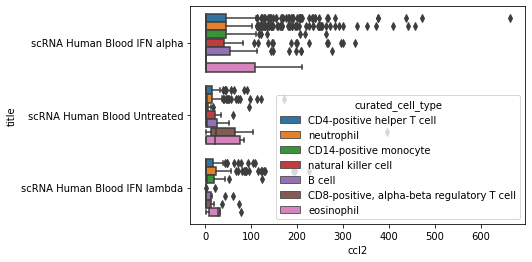

In [169]:
fig = sns.boxplot(df3, x="ccl2", y="title",hue ="curated_cell_type")

#### Looking at gene expression levels of GZMB across the cohorts for different cell types

In [170]:
# Looking at GZMB expression 
df4 = omixatlas.query_metadata(
    f"""
    SELECT obs_name,GZMB,PRF1, cells.curated_raw_cell_type,cells.title
    FROM data_matrices.{data_table_name} as matrix
    JOIN (SELECT * FROM sc_data_lake.samples_singlecell
    WHERE src_dataset_id = 'GSE142637_GPL21290') as cells 
    
    ON cells.sample_id = matrix.obs_name
    AND matrix.GZMB > 0
    AND matrix.PRF1 > 0""")
df4

Query execution succeeded (time taken: 4.44 seconds, data scanned: 51.423 MB)
Fetched 643 rows


,curated_raw_cell_type,gzmb,obs_name,prf1,title
0,CD4+ T cell,7.0,GSM4233279:GTGCTTCGTAGGAGGG,1.0,scRNA Human Blood IFN lambda
1,neutrophil,15.0,GSM4233279:CTCCCAAGTTTACCAG,2.0,scRNA Human Blood IFN lambda
2,monocyte,4.0,GSM4233279:GATTCGACATGAGAAT,1.0,scRNA Human Blood IFN lambda
3,neutrophil,7.0,GSM4233278:TTTCCTCGTGCGTGCT,15.0,scRNA Human Blood IFN alpha
4,neutrophil,4.0,GSM4233278:TTTGGTTAGTCATTGC,6.0,scRNA Human Blood IFN alpha
...,...,...,...,...,...
638,neutrophil,1.0,GSM4233278:CATTCATTCCGATTAG,1.0,scRNA Human Blood IFN alpha
639,neutrophil,6.0,GSM4233280:CTTAGGACATAGAAAC,1.0,scRNA Human Blood Untreated
640,neutrophil,11.0,GSM4233280:GAGGGTAGTAGCTCGC,1.0,scRNA Human Blood Untreated
641,CD4+ T cell,5.0,GSM4233280:GGGTCTGCACAAATCC,2.0,scRNA Human Blood Untreated


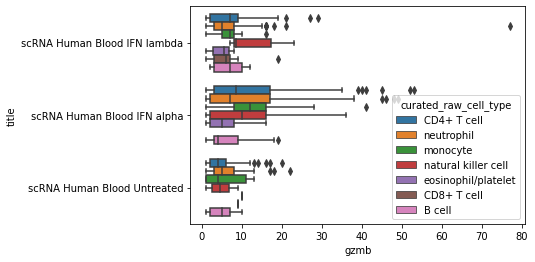

In [174]:
fig = sns.boxplot(df4, x="gzmb", y="title",hue = "curated_raw_cell_type")

### Looking at blood datasets with Gene marker as GZNB

In [177]:
markers_gene = omixatlas.query_metadata(
    f"""
    SELECT src_dataset_id, markers, dataset.curated_tissue , dataset.dataset_id , dataset.data_table_name , dataset.curated_disease 
    FROM sc_data_lake.samples_singlecell as cells
    CROSS JOIN UNNEST(curated_marker_present) AS t(markers)
    JOIN (SELECT * FROM sc_data_lake.datasets
    WHERE CONTAINS(curated_tissue, recommend('curated_tissue', 'blood', 'related'))) as dataset
    
    ON dataset.dataset_id = cells.src_dataset_id
    AND markers LIKE '%GZMB%'""")
markers_gene

Query execution succeeded (time taken: 5.61 seconds, data scanned: 131.373 MB)
Fetched 88426 rows


,dataset_id,src_dataset_id,curated_disease,curated_tissue,data_table_name,markers
0,GSE129007_GPL16791,GSE129007_GPL16791,"[Normal, Carney Complex]",[blood],sc_data_lake__gse129007_gpl16791,Raji-stimulated CAR-T cell-CD3D|IFNG|GZMB|ACTB
1,GSE129007_GPL16791,GSE129007_GPL16791,"[Normal, Carney Complex]",[blood],sc_data_lake__gse129007_gpl16791,Raji-stimulated CAR-T cell-CD3D|IFNG|GZMB|ACTB
2,GSE129007_GPL16791,GSE129007_GPL16791,"[Normal, Carney Complex]",[blood],sc_data_lake__gse129007_gpl16791,Raji-stimulated CAR-T cell-CD3D|IFNG|GZMB|ACTB
3,GSE129007_GPL16791,GSE129007_GPL16791,"[Normal, Carney Complex]",[blood],sc_data_lake__gse129007_gpl16791,Raji-stimulated CAR-T cell-CD3D|IFNG|GZMB|ACTB
4,GSE129007_GPL16791,GSE129007_GPL16791,"[Normal, Carney Complex]",[blood],sc_data_lake__gse129007_gpl16791,Raji-stimulated CAR-T cell-CD3D|IFNG|GZMB|ACTB
...,...,...,...,...,...,...
88421,GSE133028_GPL27644_PB,GSE133028_GPL27644_PB,"[Demyelinating Diseases, Multiple Sclerosis, R...",[blood],sc_data_lake__gse133028_gpl27644_pb,NK-NKG7|GNLY|GZMB
88422,GSE133028_GPL27644_PB,GSE133028_GPL27644_PB,"[Demyelinating Diseases, Multiple Sclerosis, R...",[blood],sc_data_lake__gse133028_gpl27644_pb,NK-NKG7|GNLY|GZMB
88423,GSE133028_GPL27644_PB,GSE133028_GPL27644_PB,"[Demyelinating Diseases, Multiple Sclerosis, R...",[blood],sc_data_lake__gse133028_gpl27644_pb,NK-NKG7|GNLY|GZMB
88424,GSE133028_GPL27644_PB,GSE133028_GPL27644_PB,"[Demyelinating Diseases, Multiple Sclerosis, R...",[blood],sc_data_lake__gse133028_gpl27644_pb,NK-NKG7|GNLY|GZMB


In [176]:
markers_gene.curated_disease.value_counts()

[Diabetes Mellitus, Type 1]                                                                                                                      36857
[Demyelinating Diseases, Multiple Sclerosis, Relapsing-Remitting, Multiple Sclerosis, Nervous System Diseases, Epstein-Barr Virus Infections]    26941
[Celiac Disease, Autoimmune Diseases, COVID-19, Multiple Sclerosis, Vasculitis]                                                                   9591
[Squamous Cell Carcinoma of Head and Neck, Stomatitis]                                                                                            8306
[Normal, Carney Complex]                                                                                                                          3259
[Lupus Erythematosus, Systemic]                                                                                                                   2512
[Drug Hypersensitivity Syndrome, Normal, Autoimmune Diseases, Eosinophilia, Herpesviridae Infe

In [179]:
df4 = omixatlas.query_metadata(
    f"""
    SELECT obs_name,GZMB, cells.curated_raw_cell_type,cells.title,cells.src_dataset_id,cells.curated_disease
    FROM data_matrices.sc_data_lake__gse129007_gpl16791 as matrix
    JOIN (SELECT * FROM sc_data_lake.samples_singlecell
    WHERE src_dataset_id = 'GSE129007_GPL16791') as cells 
    ON cells.sample_id = matrix.obs_name
    AND matrix.GZMB > 0
    UNION
    SELECT obs_name,GZMB, cells.curated_raw_cell_type,cells.title,cells.src_dataset_id,cells.curated_disease
    FROM data_matrices.sc_data_lake__gse133028_gpl27644_pb as matrix
    JOIN (SELECT * FROM sc_data_lake.samples_singlecell
    WHERE src_dataset_id = 'GSE133028_GPL27644_PB') as cells 
    ON cells.sample_id = matrix.obs_name
    AND matrix.GZMB > 0
    UNION
    SELECT obs_name,GZMB, cells.curated_raw_cell_type,cells.title,cells.src_dataset_id,cells.curated_disease
    FROM data_matrices.sc_data_lake__gse107747_gpl16791_p2 as matrix
    JOIN (SELECT * FROM sc_data_lake.samples_singlecell
    WHERE src_dataset_id = 'GSE107747_GPL16791_p2') as cells 
    ON cells.sample_id = matrix.obs_name
    AND matrix.GZMB > 0 """)
df4

Query execution succeeded (time taken: 6.94 seconds, data scanned: 2563.484 MB)
Fetched 22877 rows


,src_dataset_id,curated_disease,curated_raw_cell_type,gzmb,obs_name,title
0,GSE107747_GPL16791_p2,"[Carcinoma, Hepatocellular]",monocyte,2.0,GSM2877960:GGGCATCTCGCGCCAA,Patient 2
1,GSE107747_GPL16791_p2,"[Carcinoma, Hepatocellular]",monocyte,4.0,GSM2877960:GTACTCCGTAACGCGA,Patient 2
2,GSE107747_GPL16791_p2,"[Carcinoma, Hepatocellular]",monocyte,1.0,GSM2877960:ACATGGTAGACGCAAC,Patient 2
3,GSE129007_GPL16791,[Normal],unstimulated CAR-T cell,83.0,GSM3689929:TTTTACCATTAT,unstimulated CAR-T cells
4,GSE129007_GPL16791,[Normal],unstimulated CAR-T cell,24.0,GSM3689929:TTGGCCTAGATA,unstimulated CAR-T cells
...,...,...,...,...,...,...
22872,GSE133028_GPL27644_PB,[],T4,2.0,TCAGGTAAGAAACCGC-10_t1_PB_uns_5pGEX-15,10_PB_uns_5pGEX
22873,GSE133028_GPL27644_PB,[],NK,1.0,TCTTCGGAGCGATTCT-10_t1_PB_uns_5pGEX-15,10_PB_uns_5pGEX
22874,GSE133028_GPL27644_PB,[],T4,2.0,GCGCAGTGTTCCGTCT-21_t3_PB_uns_5pGEX-20,21_PB_uns_5pGEX
22875,GSE133028_GPL27644_PB,[],T8,1.0,GGATGTTAGTTGAGTA-21_t3_PB_uns_5pGEX-20,21_PB_uns_5pGEX


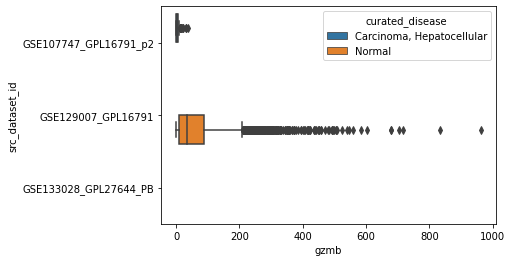

In [180]:
df4 = df4.explode('curated_disease')
fig = sns.boxplot(df4, x="gzmb", y="src_dataset_id",hue = "curated_disease")

### Description Querying
Lets us look at datasets that follow the 10x genomics chromium protocol using this simple query

In [53]:
df_des = omixatlas.query_metadata(f"""SELECT dataset_id,curated_disease,curated_organism,curated_tissue,data_type,src_repo,total_num_samples,total_num_cells,
                description,overall_design,summary FROM sc_data_lake.datasets  
                WHERE (description LIKE '%chromium%') OR
                (overall_design LIKE '%chromium%') OR
                (summary LIKE '%chromium%')""")
df_des

Query execution succeeded (time taken: 2.19 seconds, data scanned: 1.255 MB)
Fetched 41 rows


,dataset_id,curated_disease,curated_organism,curated_tissue,data_type,description,overall_design,src_repo,summary,total_num_cells,total_num_samples
0,GSE160043_GPL22523,[Normal],[Macaca fascicularis],[embryo],Single cell,The embryonic ontogeny of the gonadal somatic ...,Single cell transcriptome analysis of cynomolg...,sc_data_lake,"In the early fetal stage, the gonads are bipot...",27626,4
1,GSE160664_GPL24676,"[Cystic Fibrosis, Normal]",[Homo sapiens],[respiratory epithelium],Single cell,Analysis of normal human lung small and large ...,Single cell RNA-seq using 10x chromium system ...,sc_data_lake,Single cell RNA sequencing of normal human lun...,19335,10
2,GSE163947_GPL24247,"[Diabetes Mellitus, Neoplasms, Normal]",[Mus musculus],"[blood, pancreatic islet]",Single cell,MYCL-mediated in vivo reprogramming expands pa...,"For scRNAseq in chimeric mouse islets, we tran...",sc_data_lake,Î² cell proliferation rates decline with age a...,20145,5
3,GSE167924_GPL20301,"[Cataract, congenital, with microcornea or sli...",[Homo sapiens],[trophectoderm],Single cell,Capturing human trophoblast development with n...,Analyzing transcriptional profiles during naiv...,sc_data_lake,We report global transcriptional alteration an...,12520,4
4,GSE173774_GPL24247,"[Neoplasms, Normal]",[Mus musculus],"[joint, lymph node]",Single cell,Multi-resolution deconvolution of spatial tran...,Lymph nodes from mice treated with mycobacteri...,sc_data_lake,The function of mammalian cells is largely inf...,16324,4
5,GSE174458_GPL21103,"[Myocarditis, Cardiomyopathy, Dilated, Coxsack...",[Mus musculus],[heart],Single cell,Dissecting the Cellular Landscape and Transcri...,"Two replicates, with n=7 mice per treatment gr...",sc_data_lake,Myocarditis induced with Coxsackievirus B3 (CV...,20973,4
6,GSE174481_GPL18573,[Squamous Cell Carcinoma of Head and Neck],[Homo sapiens],[placenta],Single cell,Single cell trajectory modeling identifies a p...,Placental tissues: First trimester placental t...,sc_data_lake,The establishment and function of the human pl...,22027,13
7,GSE175525_GPL24676,[Normal],[Homo sapiens],[hip],Single cell,Resolution of the curse of dimensionality in s...,Single cell transcriptome analysis of human pr...,sc_data_lake,Single-cell RNA sequencing (scRNA-seq) can det...,9015,1
8,GSE180298_GPL18573,[Normal],[Homo sapiens],[bone marrow],Single cell,Uncovering perturbations in human hematopoiesi...,Analysis of hematopoietic stem and progenitor ...,sc_data_lake,Early hematopoiesis is a continuous process in...,81854,8
9,GSE209748_GPL24676,[Normal],[Homo sapiens],[lung],Single cell,Cryobanking of human distal lung epithelial ce...,Single cell RNA-seq using 10x chromium system ...,sc_data_lake,The epithelium lining airspaces of the human l...,35496,2


### Downloading a dataset

In [55]:
dataset = "GSE129007_GPL16791"
# Gather url
url = omixatlas.download_data("sc_data_lake", dataset).get('data')['attributes']['download_url']
ext = ".h5ad"
file_name = dataset+ext

# Download file
if not os.path.isfile(file_name):
    os.system(f"curl -o '{file_name}' '{url}'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0  176M    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  176M  100  176M    0     0  36.8M      0  0:00:04  0:00:04 --:--:-- 38.2M
100  176M  100  176M    0     0  36.8M      0  0:00:04  0:00:04 --:--:-- 38.2M
